In [1]:
import scipy.io
import numpy as np  

In [ ]:
path_data = "data/binaryalphadigs.mat"
caracs = {
    '0':0, '1':1, '2':2, '3':3, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, 
    'A':10, 'B':11, 'C':12, 'D':13, 'E':14, 'F':15, 'G':16, 'H':17, 'I':18,
    'J':19, 'K':20, 'L':21, 'M':22, 'N':23, 'O':24, 'P':25, 'Q':26, 'R':27,
    'S':28, 'T':29, 'U':30, 'V':31, 'W':32, 'X':33, 'Y':34, 'Z':35 
}

In [ ]:
data = scipy.io.loadmat(path_data)

In [ ]:
def lire_alpha_digit(caractere_list, path_data):
    # caractere_list = [caracs[el] for el in caractere_list]
    n = len(caractere_list)
    caractere_list = map(lambda x: caracs[x], caractere_list)
    data = scipy.io.loadmat(path_data)
    data = list(data['dat'][i] for i in caractere_list)
    final_data = []
    # For each letter
    for i in range(n):
        data_tmp = [data[i][j].flatten() for j in range(39)] 
        final_data.append(np.vstack(data_tmp))
        if np.vstack(data_tmp).shape[0] != 39:
            raise ValueError
        
    p = final_data[0].shape[1]
    final_data = np.vstack(final_data)
    final_data = np.resize(final_data, (final_data.shape[0], 1, final_data.shape[1]))

    return final_data, p

In [ ]:
lire_alpha_digit(['A', 'B'], path_data)

In [2]:
from principal_RBM_alpha import *

In [ ]:
dict_az = {
    '0':0, '1':1, '2':2, '3':3, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, 
    'A':10, 'B':11, 'C':12, 'D':13, 'E':14, 'F':15, 'G':16, 'H':17, 'I':18,
    'J':19, 'K':20, 'L':21, 'M':22, 'N':23, 'O':24, 'P':25, 'Q':26, 'R':27,
    'S':28, 'T':29, 'U':30, 'V':31, 'W':32, 'X':33, 'Y':34, 'Z':35 
}
path_data = "data/binaryalphadigs.mat"
nb_pixels = 20*16
neurons = [200, 100, 50]
epochs = [200, 300, 500]
layers = []
for neuron in neurons :
    for epoch in epochs : 
        rbm_trained = []
        for carac in list(dict_az.keys()):
            data, nb_pixels = lire_alpha_digit([carac], path_data)
            print("Caractère : ", carac)
            rbm = RBM()
            rbm.init_RBM(
            p = nb_pixels, 
            q = neuron)
            rbm.train_RBM(epochs=200, lr=0.1, batch_fraction=0.2, x=data, plot_error=False)
            rbm_trained.append(rbm)

        # afficher images
        fig, axs = plt.subplots(5, 7, sharex=True, sharey=True)
        fig.suptitle(f'RBM {neuron} neurons, {epoch} epochs')
        for i in range(5):
            for j in range(7):
                rbm = rbm_trained[i*7 + j]
                img = rbm.generer_image_RBM(100, 1)
                axs[i, j].imshow(img[0].cpu(), cmap='Greys')
        plt.show()
        fig.savefig(f"res/RBM-{neuron}neurons-{epoch}epochs.png")

### DBN

In [1]:
from principal_RBM_alpha import *
from principal_DBN_alpha_2 import *

Caractère :  0
====================== RBM n°1 ======================

Taille des données ====> torch.Size([39, 1, 320])
Batch size ====> 7
====================== RBM n°2 ======================

Taille des données ====> torch.Size([39, 1, 200])
Batch size ====> 7
Caractère :  1
====================== RBM n°1 ======================

Taille des données ====> torch.Size([39, 1, 320])
Batch size ====> 7
====================== RBM n°2 ======================

Taille des données ====> torch.Size([39, 1, 200])
Batch size ====> 7
Caractère :  2
====================== RBM n°1 ======================

Taille des données ====> torch.Size([39, 1, 320])
Batch size ====> 7
====================== RBM n°2 ======================

Taille des données ====> torch.Size([39, 1, 200])
Batch size ====> 7
Caractère :  3
====================== RBM n°1 ======================

Taille des données ====> torch.Size([39, 1, 320])
Batch size ====> 7
====================== RBM n°2 ======================

Taille des donnée

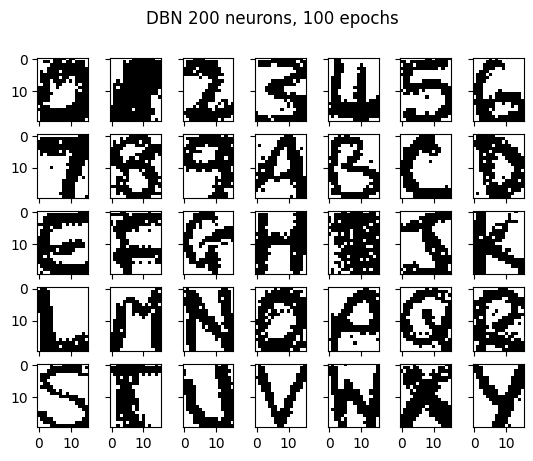

Caractère :  0
====================== RBM n°1 ======================

Taille des données ====> torch.Size([39, 1, 320])
Batch size ====> 7
====================== RBM n°2 ======================

Taille des données ====> torch.Size([39, 1, 200])
Batch size ====> 7
Caractère :  1
====================== RBM n°1 ======================

Taille des données ====> torch.Size([39, 1, 320])
Batch size ====> 7
====================== RBM n°2 ======================

Taille des données ====> torch.Size([39, 1, 200])
Batch size ====> 7
Caractère :  2
====================== RBM n°1 ======================

Taille des données ====> torch.Size([39, 1, 320])
Batch size ====> 7
====================== RBM n°2 ======================

Taille des données ====> torch.Size([39, 1, 200])
Batch size ====> 7
Caractère :  3
====================== RBM n°1 ======================

Taille des données ====> torch.Size([39, 1, 320])
Batch size ====> 7
====================== RBM n°2 ======================

Taille des donnée

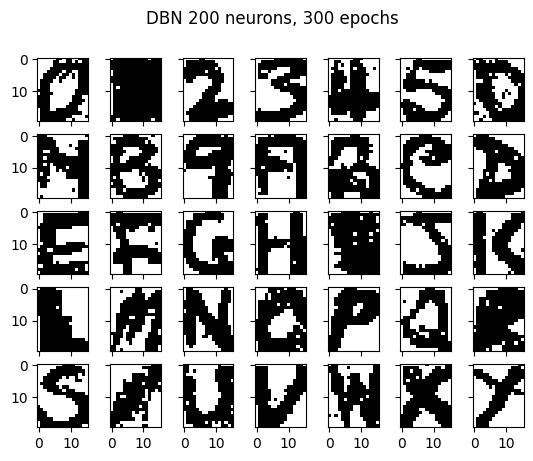

Caractère :  0
====================== RBM n°1 ======================

Taille des données ====> torch.Size([39, 1, 320])
Batch size ====> 7
====================== RBM n°2 ======================

Taille des données ====> torch.Size([39, 1, 200])
Batch size ====> 7
Caractère :  1
====================== RBM n°1 ======================

Taille des données ====> torch.Size([39, 1, 320])
Batch size ====> 7
====================== RBM n°2 ======================

Taille des données ====> torch.Size([39, 1, 200])
Batch size ====> 7
Caractère :  2
====================== RBM n°1 ======================

Taille des données ====> torch.Size([39, 1, 320])
Batch size ====> 7
====================== RBM n°2 ======================

Taille des données ====> torch.Size([39, 1, 200])
Batch size ====> 7
Caractère :  3
====================== RBM n°1 ======================

Taille des données ====> torch.Size([39, 1, 320])
Batch size ====> 7
====================== RBM n°2 ======================

Taille des donnée

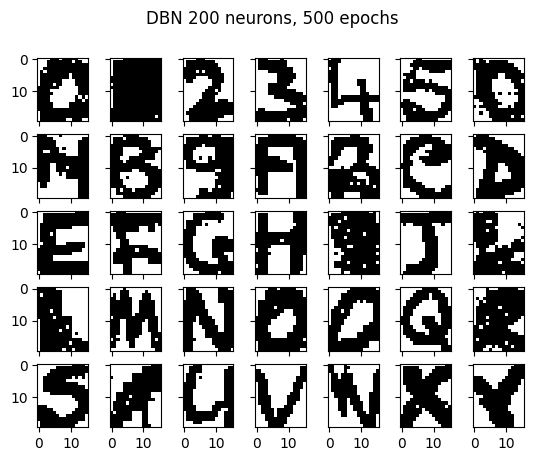

Caractère :  0
====================== RBM n°1 ======================

Taille des données ====> torch.Size([39, 1, 320])
Batch size ====> 7
====================== RBM n°2 ======================

Taille des données ====> torch.Size([39, 1, 100])
Batch size ====> 7
Caractère :  1
====================== RBM n°1 ======================

Taille des données ====> torch.Size([39, 1, 320])
Batch size ====> 7
====================== RBM n°2 ======================

Taille des données ====> torch.Size([39, 1, 100])
Batch size ====> 7
Caractère :  2
====================== RBM n°1 ======================

Taille des données ====> torch.Size([39, 1, 320])
Batch size ====> 7
====================== RBM n°2 ======================

Taille des données ====> torch.Size([39, 1, 100])
Batch size ====> 7
Caractère :  3
====================== RBM n°1 ======================

Taille des données ====> torch.Size([39, 1, 320])
Batch size ====> 7
====================== RBM n°2 ======================

Taille des donnée

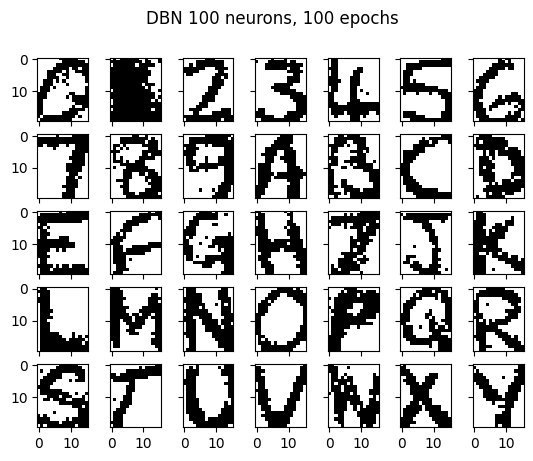

Caractère :  0
====================== RBM n°1 ======================

Taille des données ====> torch.Size([39, 1, 320])
Batch size ====> 7
====================== RBM n°2 ======================

Taille des données ====> torch.Size([39, 1, 100])
Batch size ====> 7
Caractère :  1
====================== RBM n°1 ======================

Taille des données ====> torch.Size([39, 1, 320])
Batch size ====> 7
====================== RBM n°2 ======================

Taille des données ====> torch.Size([39, 1, 100])
Batch size ====> 7
Caractère :  2
====================== RBM n°1 ======================

Taille des données ====> torch.Size([39, 1, 320])
Batch size ====> 7
====================== RBM n°2 ======================

Taille des données ====> torch.Size([39, 1, 100])
Batch size ====> 7
Caractère :  3
====================== RBM n°1 ======================

Taille des données ====> torch.Size([39, 1, 320])
Batch size ====> 7
====================== RBM n°2 ======================

Taille des donnée

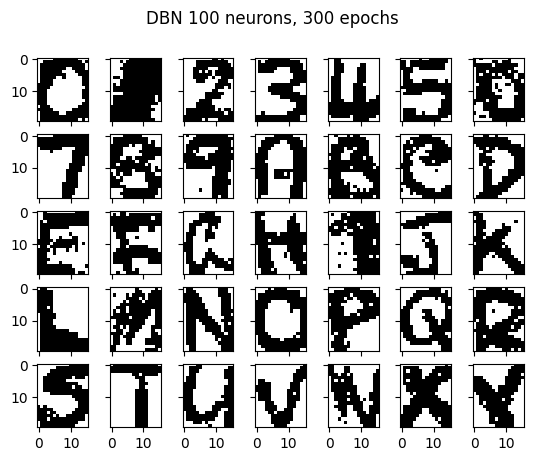

Caractère :  0
====================== RBM n°1 ======================

Taille des données ====> torch.Size([39, 1, 320])
Batch size ====> 7
====================== RBM n°2 ======================

Taille des données ====> torch.Size([39, 1, 100])
Batch size ====> 7
Caractère :  1
====================== RBM n°1 ======================

Taille des données ====> torch.Size([39, 1, 320])
Batch size ====> 7
====================== RBM n°2 ======================

Taille des données ====> torch.Size([39, 1, 100])
Batch size ====> 7
Caractère :  2
====================== RBM n°1 ======================

Taille des données ====> torch.Size([39, 1, 320])
Batch size ====> 7
====================== RBM n°2 ======================

Taille des données ====> torch.Size([39, 1, 100])
Batch size ====> 7
Caractère :  3
====================== RBM n°1 ======================

Taille des données ====> torch.Size([39, 1, 320])
Batch size ====> 7
====================== RBM n°2 ======================

Taille des donnée

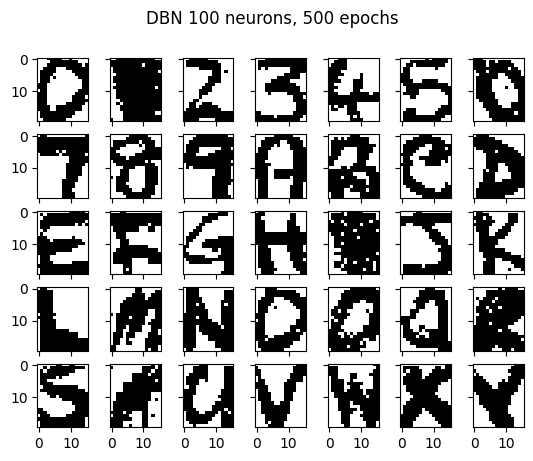

Caractère :  0
====================== RBM n°1 ======================

Taille des données ====> torch.Size([39, 1, 320])
Batch size ====> 7
====================== RBM n°2 ======================

Taille des données ====> torch.Size([39, 1, 50])
Batch size ====> 7
Caractère :  1
====================== RBM n°1 ======================

Taille des données ====> torch.Size([39, 1, 320])
Batch size ====> 7
====================== RBM n°2 ======================

Taille des données ====> torch.Size([39, 1, 50])
Batch size ====> 7
Caractère :  2
====================== RBM n°1 ======================

Taille des données ====> torch.Size([39, 1, 320])
Batch size ====> 7
====================== RBM n°2 ======================

Taille des données ====> torch.Size([39, 1, 50])
Batch size ====> 7
Caractère :  3
====================== RBM n°1 ======================

Taille des données ====> torch.Size([39, 1, 320])
Batch size ====> 7
====================== RBM n°2 ======================

Taille des données =

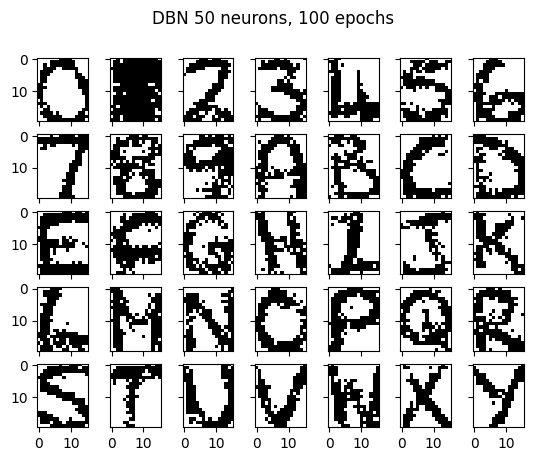

Caractère :  0
====================== RBM n°1 ======================

Taille des données ====> torch.Size([39, 1, 320])
Batch size ====> 7
====================== RBM n°2 ======================

Taille des données ====> torch.Size([39, 1, 50])
Batch size ====> 7
Caractère :  1
====================== RBM n°1 ======================

Taille des données ====> torch.Size([39, 1, 320])
Batch size ====> 7
====================== RBM n°2 ======================

Taille des données ====> torch.Size([39, 1, 50])
Batch size ====> 7
Caractère :  2
====================== RBM n°1 ======================

Taille des données ====> torch.Size([39, 1, 320])
Batch size ====> 7
====================== RBM n°2 ======================

Taille des données ====> torch.Size([39, 1, 50])
Batch size ====> 7
Caractère :  3
====================== RBM n°1 ======================

Taille des données ====> torch.Size([39, 1, 320])
Batch size ====> 7
====================== RBM n°2 ======================

Taille des données =

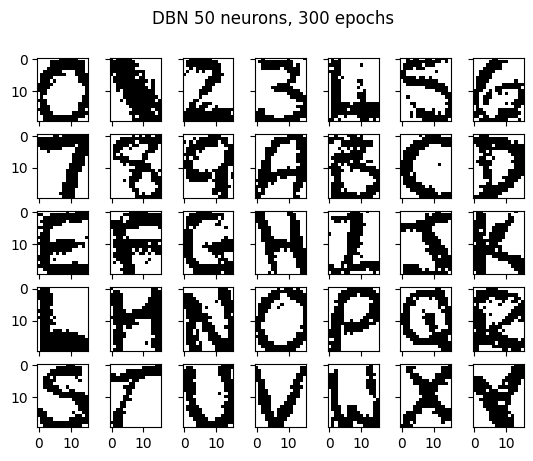

Caractère :  0
====================== RBM n°1 ======================

Taille des données ====> torch.Size([39, 1, 320])
Batch size ====> 7
====================== RBM n°2 ======================

Taille des données ====> torch.Size([39, 1, 50])
Batch size ====> 7
Caractère :  1
====================== RBM n°1 ======================

Taille des données ====> torch.Size([39, 1, 320])
Batch size ====> 7
====================== RBM n°2 ======================

Taille des données ====> torch.Size([39, 1, 50])
Batch size ====> 7
Caractère :  2
====================== RBM n°1 ======================

Taille des données ====> torch.Size([39, 1, 320])
Batch size ====> 7
====================== RBM n°2 ======================

Taille des données ====> torch.Size([39, 1, 50])
Batch size ====> 7
Caractère :  3
====================== RBM n°1 ======================

Taille des données ====> torch.Size([39, 1, 320])
Batch size ====> 7
====================== RBM n°2 ======================

Taille des données =

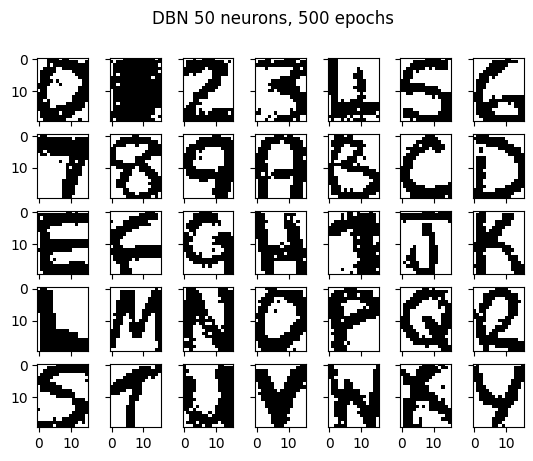

In [2]:
dict_az = {
    '0':0, '1':1, '2':2, '3':3, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, 
    'A':10, 'B':11, 'C':12, 'D':13, 'E':14, 'F':15, 'G':16, 'H':17, 'I':18,
    'J':19, 'K':20, 'L':21, 'M':22, 'N':23, 'O':24, 'P':25, 'Q':26, 'R':27,
    'S':28, 'T':29, 'U':30, 'V':31, 'W':32, 'X':33, 'Y':34, 'Z':35 
}
path_data = "data/binaryalphadigs.mat"
nb_pixels = 20*16
neurons = [200, 100, 50]
epochs = [100, 300, 500]
# layers = []
for neuron in neurons :
    for epoch in epochs : 
        dbn_trained = []
        for carac in list(dict_az.keys()):
            data, nb_pixels = lire_alpha_digit([carac], path_data)
            print("Caractère : ", carac)
            dbn = DBN()
            Q = [nb_pixels, neuron, neuron]
            dbn.init_DBN(
                Q = Q
                )
            dbn.train_DBN(epochs=[epoch], lr=0.1, batch_fraction=0.2, x=data, plot_error=False)
            dbn_trained.append(dbn)

        # afficher images
        fig, axs = plt.subplots(5, 7, sharex=True, sharey=True)
        fig.suptitle(f'DBN {neuron} neurons, {epoch} epochs')
        for i in range(5):
            for j in range(7):
                dbn = dbn_trained[i*7 + j]
                img = dbn.generer_image_DBN(100, 1)
                axs[i, j].imshow(img[0].cpu(), cmap='Greys')
        plt.show()
        fig.savefig(f"res/DBN-{neuron}neurons-{epoch}epochs.png")